In [10]:
from __future__ import division
from sklearn.datasets import load_digits

In [2]:
x, y = load_digits(n_class=10, return_X_y=True)

In [3]:
x.shape, y.shape

((1797L, 64L), (1797L,))

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

1


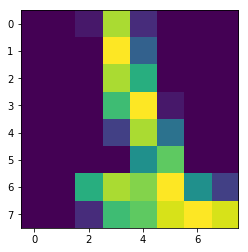

In [11]:
idx = 1000

img = x[idx].reshape(8, 8) / 255
plt.imshow(img)

print(y[idx])

<h2>Normalização</h2>

In [13]:
# Normalizar os valores dos pixels em um range 0-1
x = x / 255

<h2>Validação Cruzada</h2>

In [14]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [21]:
kf = KFold(n_splits=10)
acuracia_list = []
precisao_list = []
recall_list = []

for train_index, test_index in kf.split(x):
    train_imgs, test_imgs = x[train_index], x[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    
    # Criar novo modelo MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100,), early_stopping=True)
    mlp.fit(train_imgs, train_labels)
    
    pred_labels = mlp.predict(test_imgs)
    acuracia_list.append(accuracy_score(test_labels, pred_labels))
    precisao_list.append(precision_score(test_labels, pred_labels, average='micro'))
    recall_list.append(recall_score(test_labels, pred_labels, average='micro'))
    

In [42]:
import numpy as np
import scipy.ndimage
from PIL import Image

In [62]:
# test_sample = scipy.ndimage.imread('sample_0.png', mode='L')

img = Image.open('sample_0.png').convert('L')

In [63]:
img = img.resize((8, 8))

In [65]:
test_sample = np.asarray(img)

In [68]:
# test_sample

In [69]:
# plt.imshow(test_sample)

In [61]:
mlp.predict(test_sample.reshape(1, 64))

array([5])